# Assignment 4 - Clustering

## Instructions

For the Fourth Assignment, we are going to be implementing the clustering algorithms: k-Means and Agglomerative/Hierarchical clustering.

1. Each task is associated with each type of clustering mathod.
2. Each task will use its own dataset that is already written in the cell.
3. Each assignment is presenting a challenge.

## Task1: K-means

Run this cell to read and display top 5 rows of data

In [1]:
# Required Libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
# Loading dataset

cluster_data = pd.read_csv("Employee_Retention.csv")
cluster_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0.38,0.53,2,157,3,0,0,1
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,1
4,0.37,0.52,2,159,3,0,0,1


### Part 1A: 10 points
Check if there are any missing values. If yes, fill them with appropriate methods. Scale the data for further processing. Display the processed data. Regardless of any action, explain your decision for the action.

In [3]:
cluster_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
cluster_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
left                     0
dtype: int64

In [5]:
cluster_data.fillna(cluster_data.mean(), inplace = True) #no need to fill mean, as we dont see null in any columns

In [6]:
stdScale = StandardScaler()
data_scaled = stdScale.fit_transform(cluster_data)
print(data_scaled)

[[-0.93649469 -1.08727529 -1.46286291 ... -0.41116529 -0.14741182
   1.788917  ]
 [ 0.75281433  0.84070693  0.97111292 ... -0.41116529 -0.14741182
   1.788917  ]
 [-2.02247906  0.95755433  2.59376348 ... -0.41116529 -0.14741182
   1.788917  ]
 ...
 [-0.97671633 -1.08727529 -1.46286291 ... -0.41116529 -0.14741182
   1.788917  ]
 [-2.02247906  1.42494396  1.7824382  ... -0.41116529 -0.14741182
   1.788917  ]
 [-0.97671633 -1.14569899 -1.46286291 ... -0.41116529 -0.14741182
   1.788917  ]]


In [7]:
# Explain your actions
#1. After loading the dataset, for checking the missing values used isnull() method in each column of the dataframe.
#2. If any column has missing value we can use different methods to fill them, I used to fill them with mean value using the fillna() method.
#3. Using StandardScaler() class from scikit-learn, scaled the dataset. 
#4. This scales each column so that it has unit variance and zero mean.

### Part 1B: 15 points

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

We need some way to determine whether we are using the right number of clusters when using k-means clustering. One method to validate the number of clusters is the elbow method.

For this task, you need to perform the elbow method for k from 3 to 6 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). 

Explain from the graph which is the most appropriate value for k.

In [8]:
# Elbow method to determine the optimal number of clusters
# calculating the sum of squared error for each value of k using KMeans algo
sserr = []
for k in range (3,7):
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data_scaled) 
    sserr.append(kmeanModel.inertia_)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

In [9]:
#determine the k value
best_kvalue = sserr.index(min(sserr)) + 3
print("Best k value:",best_kvalue)

Best k value: 6


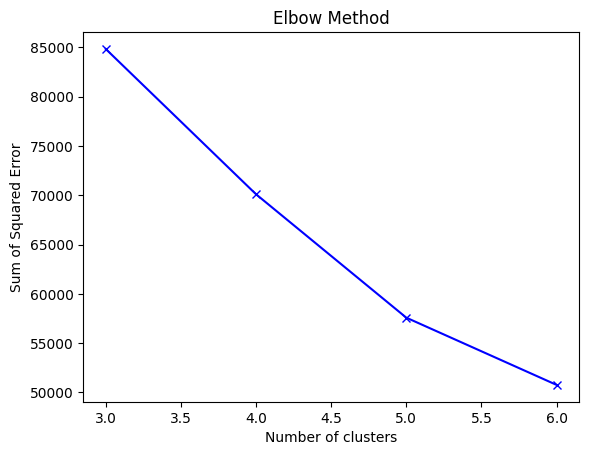

In [10]:
#plotting graph for SSE against number of clusters
plt.plot(range(3, 7), sserr, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Error')
plt.title('Elbow Method')
plt.show()


In [11]:
# Interpret the results

#1. The elbow method is used in this case for k values between 3 and 6, and the SSE values for each value of k are plotted on a line graph.
#2. To determine the best k value, we need to add 3 to the index of the minimum SSE. Since k values are ranging from 3 to 6.
#3. By doing that we are getting the best k value as 6.
#4. The best value of k is where the decline in SSE begins to level out and resembles an elbow shape.
#5. This suggests that increasing the number of clusters past this point would not significantly increase the clustering performance.
#6. But According to the graph, we could see the elbow point occurs at 5 (k=5), Hence we can say k=5 most appropriate value for this dataset


### Part 1C: 10 points

The elbow method gives an idea for which can be the most appropriate value for k. However, for cross-checking it, we use the Silhouette score to select the most appropriate value for K.

Revising what Silhouette method mean? Silhouette score is the score used to study the separation distance between the resulting clusters. The silhouette average value displays a measure of how close in average each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]. Hence, the more score is near to +1 indicates the more clear the clusters formed are clearly visible. And the more the score tends to -1 end, the more overlapping the clusters are, which we dont want.

Apply Silhouette analysis on the same data and display the score for each K value(2,12). Explain which K value you selected from the results and why?

In [12]:
# Applying Silhouette analysis on the same dataset
silht_scores = []
for k in range(2,13):
    kmeanModel = KMeans(n_clusters=k,random_state=42)
    kmeanModel.fit(data_scaled)
    scr = silhouette_score(data_scaled,kmeanModel.labels_)
    silht_scores.append(scr)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

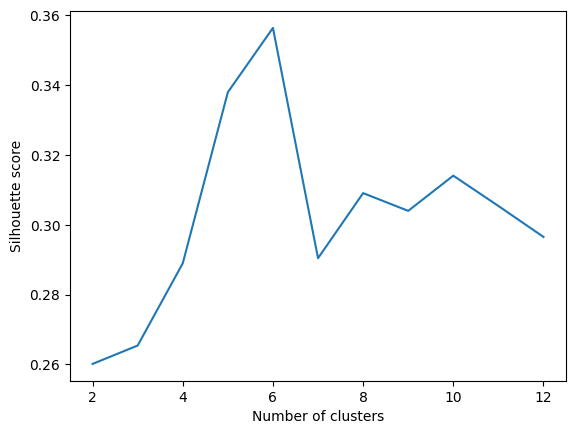

In [13]:
#plotting the score for each k value
plt.plot(range(2, 13), silht_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [16]:
# Interpret!

# Based on the graph, I could see the highest score is obtained at k=6. 
# Therefore, based on this k=6 would be the most appropriate number of cluster for this dataset.

### Part 1D: 10 points

With the best K value use K-means algorithm on the data. Print out the whole data along with the cluster labels assigned for each row in the form of new column.

In [14]:
# Select only the numeric columns
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']
numeric_data = cluster_data[numeric_cols]

# Determine the best k value using the elbow method or Silhouette analysis
best_k = 6  # Replace with the actual best k value

# Perform KMeans clustering with the best k value
kmeans = KMeans(n_clusters=best_k)
labels = kmeans.fit_predict(numeric_data)

# Add the cluster labels as a new column in the original DataFrame
cluster_data['Cluster'] = labels

# Print out the whole data along with the cluster labels assigned for each row
cluster_data.head(10)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Cluster
0,0.38,0.53,2,157,3,0,0,1,3
1,0.80,0.86,5,262,6,0,0,1,5
2,0.11,0.88,7,272,4,0,0,1,5
3,0.72,0.87,5,223,5,0,0,1,4
4,0.37,0.52,2,159,3,0,0,1,3
5,0.41,0.50,2,153,3,0,0,1,3
6,0.10,0.77,6,247,4,0,0,1,1
7,0.92,0.85,5,259,5,0,0,1,1
8,0.89,1.00,5,224,5,0,0,1,4
9,0.42,0.53,2,142,3,0,0,1,3


### Part 1E: 10 points

For each cluster that is formed, display the average value for each column from the dataset. Remember to use right dataset!

Most importantly, interpret the results that you just displayed. Interpret, do not read out the results again!

In [15]:
# Display the average value for each column, grouped by cluster
for cluster in range(best_k):
    print("Cluster", cluster)
    avg = print(cluster_data[cluster_data['Cluster'] == cluster].mean())
    print(avg)


Cluster 0
satisfaction_level         0.660482
last_evaluation            0.715620
number_project             3.773501
average_montly_hours     182.736224
time_spend_company         3.301864
Work_accident              0.163290
promotion_last_5years      0.020259
left                       0.019044
Cluster                    0.000000
dtype: float64
None
Cluster 1
satisfaction_level         0.661904
last_evaluation            0.775483
number_project             4.159700
average_montly_hours     246.639125
time_spend_company         3.697583
Work_accident              0.140431
promotion_last_5years      0.022208
left                       0.258981
Cluster                    1.000000
dtype: float64
None
Cluster 2
satisfaction_level         0.545217
last_evaluation            0.618900
number_project             3.170237
average_montly_hours     127.091488
time_spend_company         3.468442
Work_accident              0.122177
promotion_last_5years      0.022583
left                       0.3

In [17]:
correlation_matrix = cluster_data.corr(method='pearson')
correlation_matrix


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Cluster
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375,-0.139045
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567,0.033142
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787,0.096129
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287,0.259375
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822,0.049369
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622,-0.013077
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788,-0.002422
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000,0.165527
Cluster,-0.139045,0.033142,0.096129,0.259375,0.049369,-0.013077,-0.002422,0.165527,1.000000


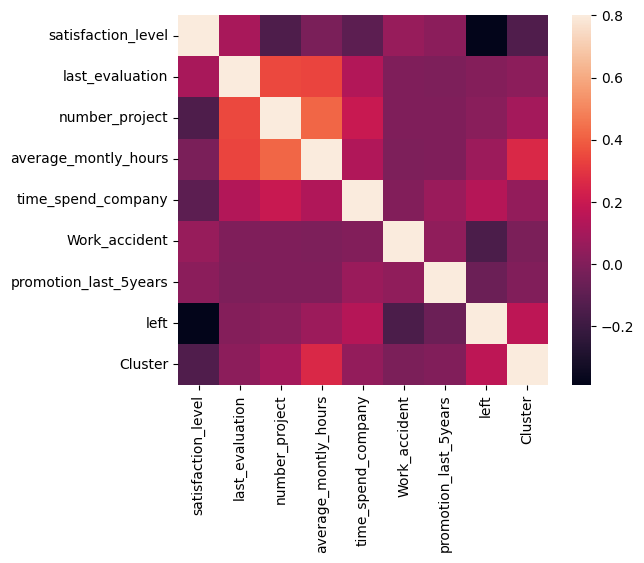

In [18]:
# To plot the correlation_matrix:

import seaborn as maps
maps.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()


In [ ]:
# Interpret your results

# From the above graph, it is clear that people who left have lower satisfaction level, had low salary and number of
# years spent in the company is high. So we can deduce that company is losing its experienced employees due to low
# salary and low satisfaction levels.

# Overall, this analysis suggests that employee satisfaction, last evaluation score, number of projects, average monthly 
# hours, and experience are the key attributes that can be used to segment employees and understand their likelihood of 
# leaving. This information can be used by HR teams to identify and target employees who may be at risk of leaving and 
# to design better retention strategies.

# By looking at the different clusters, we can interpret that there are some noticeable differences in the values of 
# the features across the different clusters. For example, Cluster 1 has employees with a high average monthly work 
# hours and a high number of projects assigned, but a low satisfaction level and a high proportion of employees who 
# have left the company. On the other hand, Cluster 3 has employees with a high satisfaction level and a low proportion 
# of employees who have left, but a lower average monthly work hours and number of projects assigned.


## Task2: Hierarchical Clustering

Simply run the cell to read the data and plot it.

In [19]:
#Load Dataset
import pandas as pd

cluster_data_2 = pd.read_csv("CarPrice.csv")
cluster_data_2.head()


,wheelbase,carlength,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarName
0,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero giulia
1,88.6,168.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero stelvio
2,94.5,171.2,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero Quadrifoglio
3,99.8,176.6,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi 100 ls
4,99.4,176.6,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi 100ls


### Part 2A: 20 points

Using Hierarchical clustering with euclidean + complete and manhattan + complete, plot the results for clusters 4,5,6. Add title for each plot.
Before applying model, drop necessary columns.

Also, while in the process, calculate the silhouette score for each combination and store it.

INTERPRET the results for each combination!

In [20]:
#Checking Null Count
cluster_data_2.isnull().sum()


wheelbase           0
carlength           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
CarName             0
dtype: int64

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [22]:
#Dropping Carname as it's String, price as it has a long range, curbweight and peakrpm due to high valued records.
X = cluster_data_2.drop(["CarName", "price", "curbweight", "peakrpm"], axis=1)
X

,wheelbase,carlength,enginesize,boreratio,stroke,compressionratio,horsepower,citympg,highwaympg
0,88.6,168.8,130,3.47,2.68,9.0,111,21,27
1,88.6,168.8,130,3.47,2.68,9.0,111,21,27
2,94.5,171.2,152,2.68,3.47,9.0,154,19,26
3,99.8,176.6,109,3.19,3.40,10.0,102,24,30
4,99.4,176.6,136,3.19,3.40,8.0,115,18,22
...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,141,3.78,3.15,9.5,114,23,28
201,109.1,188.8,141,3.78,3.15,8.7,160,19,25
202,109.1,188.8,173,3.58,2.87,8.8,134,18,23
203,109.1,188.8,145,3.01,3.40,23.0,106,26,27


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


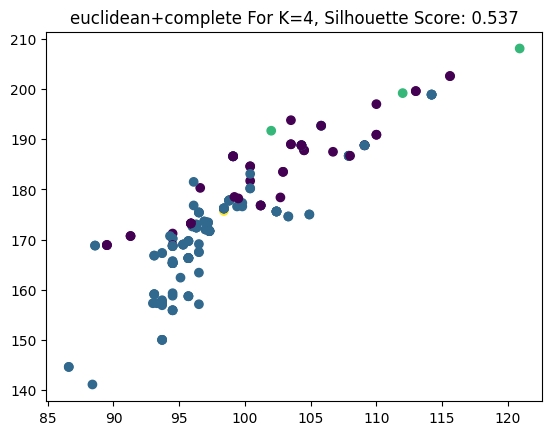

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


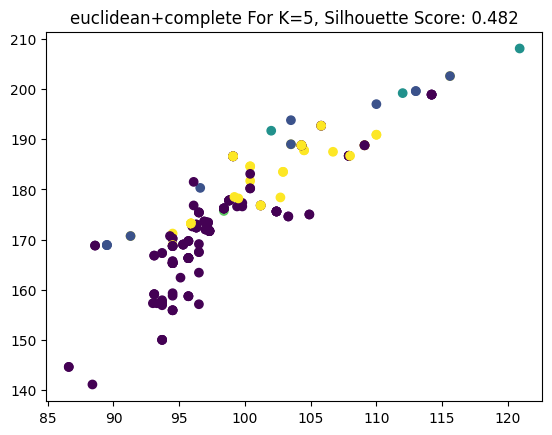

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


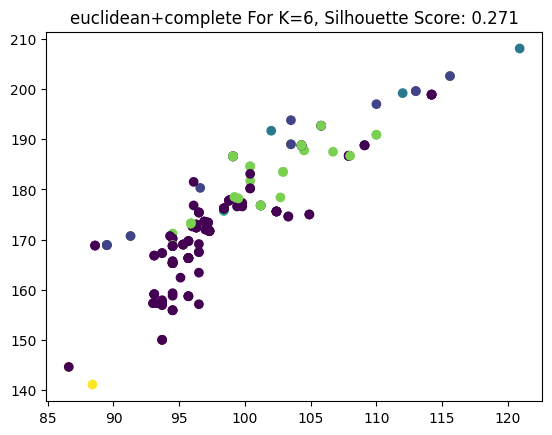

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


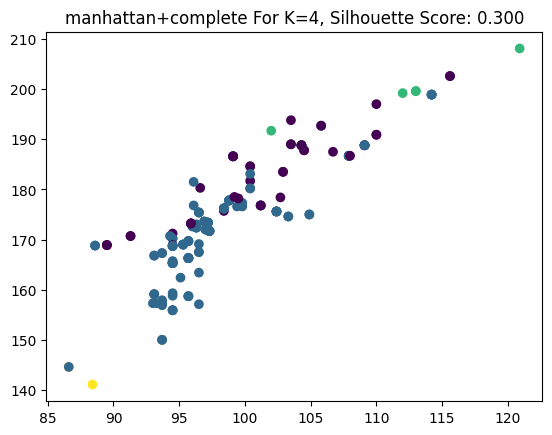

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


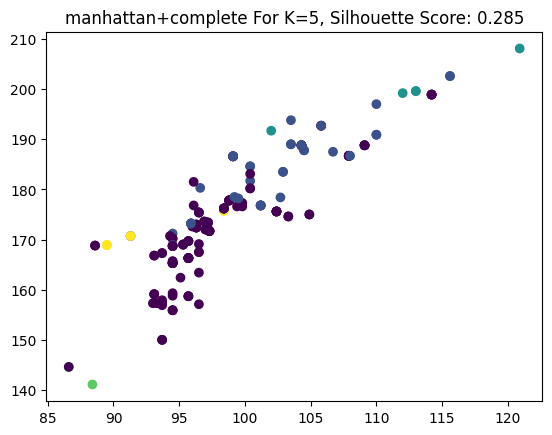

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


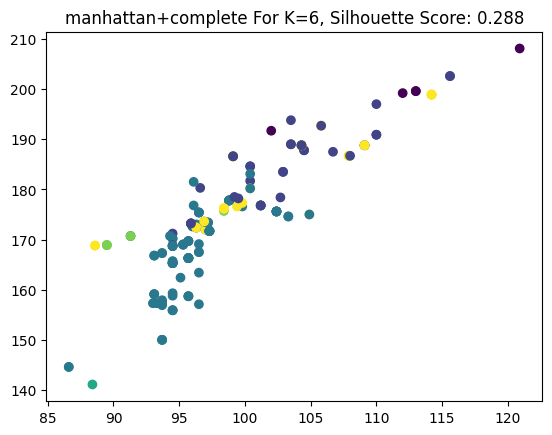

In [23]:
#Storing Silhoutte scores in a dictionary. 
silhouette_scores = {}
# Plotting graph for each cluster combination:
for linkage in ["complete"]:
    for distance in ["euclidean", "manhattan"]:
        for n_clusters in [4, 5, 6]:
            # Perform clustering
            clusterer = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage, affinity=distance)
            labels = clusterer.fit_predict(X)

            # Calculate silhouette score
            score = silhouette_score(X, labels)
            key = f"{distance}+{linkage}+{n_clusters}"
            silhouette_scores[key] = score

            # Plot results
            plt.figure()
            plt.title(f"{distance}+{linkage} For K={n_clusters}, Silhouette Score: {score:.3f}")
            plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
            plt.show()

# Interpretation of the results:

## For K=4 and Distance Matrix = Euclidean, Linkage = Complete, we get to see proper clusters and highest Silhoutte scores are generated.

### Part 2B: 10 points

Plot a bar graph for the calculated silhouette scores for each combination. Make sure to give proper title, and set proper axis labels. Make it appealing.

IMPORTANT: adjust the y axis to visualize the differences clearly.

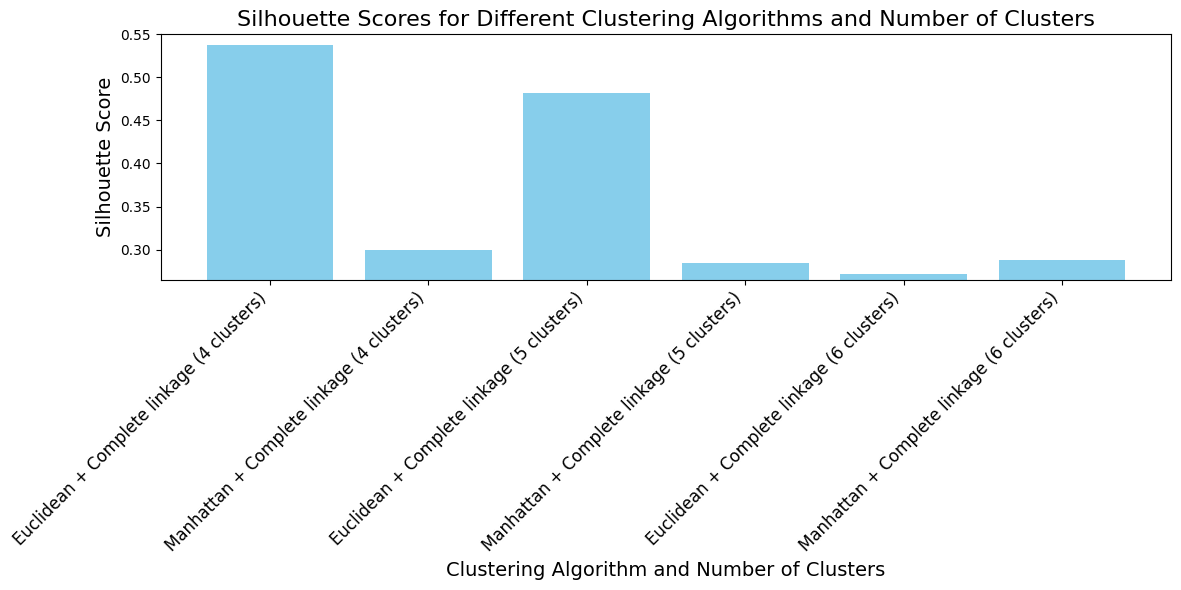

In [24]:

# Bar graph for silhouette scores
# Fetching the Silhoutte scores stored prrviously...
silhouette_scores = [silhouette_scores['euclidean+complete+4'], silhouette_scores['manhattan+complete+4'],
                     silhouette_scores['euclidean+complete+5'], silhouette_scores['manhattan+complete+5'],
                     silhouette_scores['euclidean+complete+6'], silhouette_scores['manhattan+complete+6']]
# Storing Labels for barplot in an array..
labels = ['Euclidean + Complete linkage (4 clusters)', 'Manhattan + Complete linkage (4 clusters)',
          'Euclidean + Complete linkage (5 clusters)', 'Manhattan + Complete linkage (5 clusters)',
          'Euclidean + Complete linkage (6 clusters)', 'Manhattan + Complete linkage (6 clusters)']

#Plotting the barplot.
plt.figure(figsize=(12,6))
plt.bar(labels, silhouette_scores, color='skyblue')
plt.xlabel('Clustering Algorithm and Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Scores for Different Clustering Algorithms and Number of Clusters', fontsize=16)
plt.ylim(0.265, 0.55)  # Adjust the y-axis to visualize the differences clearly
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

# Compare and comment:

## We can see that the combination of Euclidean distance with complete linkage generate the highest Silhoutte score. 
## Apart from that, we can also note that increase in clusters is inversely proportional to Silhoutte scores with respect to the barplot.

### Part 2C: 10 points

Display First 5 Car Names within each group/cluster. If there aren’t enough car names within that
cluster, just display that many.

In [25]:
# Perform clustering with the optimal parameters
clusterer = AgglomerativeClustering(n_clusters=5, linkage='complete', affinity='euclidean')
labels = clusterer.fit_predict(X)

# Add cluster labels to the DataFrame
cluster_data_2['Cluster'] = labels

# Group the DataFrame by the cluster labels and display the first 5 car names in each group
for cluster_id, cluster_df in cluster_data_2.groupby('Cluster'):
    print(f"Cluster {cluster_id}:")
    car_names = cluster_df['CarName'].values[:5]
    print(car_names)


Cluster 0:
['alfa-romero giulia' 'alfa-romero stelvio' 'audi 100 ls' 'audi 100ls'
 'audi fox']
Cluster 1:
['bmw x4' 'bmw x5' 'bmw x3' 'jaguar xj' 'jaguar xf']
Cluster 2:
['jaguar xk' 'buick century special' 'buick regal sport coupe (turbo)']
Cluster 3:
['porsche cayenne']
Cluster 4:
['alfa-romero Quadrifoglio' 'audi 4000' 'audi 5000s (diesel)' 'bmw x1'
 'bmw x3']


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


### Part 2D: 10 points

For your Selection of K, display the dendogram for the analysis and plot line where K clusters are formed. Give proper Title.

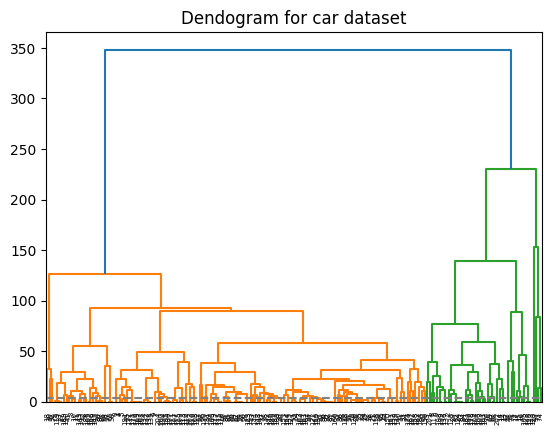

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage


plt.title("Dendogram for car dataset")
# Creating linkage for selected dataset.
cluster = linkage(X, method = 'complete')

# Generating Dendogram for given cluster:
dendrogram(cluster)
k = 4
# Representing value of K as 4 in dendogram using a dashed line:
plt.axhline(y=k, c="grey", linestyle='dashed')

plt.show()

## Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code. 
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

## Submission details

Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: Lavanya Srinivasan - 1002040671
2. Second Student Name and ID: Prem Atul Jethwa - 1001861810
3. Third Student Name and ID: Shubham Sharma - 1001964524

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

## NOTE: Only one team member will submit the file.

In [ ]:
# References:

1. https://www.statology.org/elbow-method-in-python/
2. https://vitalflux.com/k-means-elbow-point-method-sse-inertia-plot-python/
3. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
4. https://www.kaggle.com/code/subhajitnayak/country-data-clustering-by-using-pca-and -k-means
5. https://towardsdatascience.com/data-grouping-in -python-d64f1203f8d3
